In [403]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

In [404]:
df_train = pd.read_csv('train.csv')
print(f"Train:\n{df_train.shape}\n")

Train:
(1460, 81)



In [405]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.00,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.00,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.00,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.00,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.00,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [406]:
df_train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,"1,460.00","1,460.00","1,201.00","1,460.00","1,460.00","1,460.00","1,460.00","1,460.00","1,452.00","1,460.00",...,"1,460.00","1,460.00","1,460.00","1,460.00","1,460.00","1,460.00","1,460.00","1,460.00","1,460.00","1,460.00"
mean,730.50,56.90,70.05,"10,516.83",6.10,5.58,"1,971.27","1,984.87",103.69,443.64,...,94.24,46.66,21.95,3.41,15.06,2.76,43.49,6.32,"2,007.82","180,921.20"
std,421.61,42.30,24.28,"9,981.26",1.38,1.11,30.20,20.65,181.07,456.10,...,125.34,66.26,61.12,29.32,55.76,40.18,496.12,2.70,1.33,"79,442.50"
min,1.00,20.00,21.00,"1,300.00",1.00,1.00,"1,872.00","1,950.00",0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,"2,006.00","34,900.00"
25%,365.75,20.00,59.00,"7,553.50",5.00,5.00,"1,954.00","1,967.00",0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5.00,"2,007.00","129,975.00"
50%,730.50,50.00,69.00,"9,478.50",6.00,5.00,"1,973.00","1,994.00",0.00,383.50,...,0.00,25.00,0.00,0.00,0.00,0.00,0.00,6.00,"2,008.00","163,000.00"
75%,"1,095.25",70.00,80.00,"11,601.50",7.00,6.00,"2,000.00","2,004.00",166.00,712.25,...,168.00,68.00,0.00,0.00,0.00,0.00,0.00,8.00,"2,009.00","214,000.00"
max,"1,460.00",190.00,313.00,"215,245.00",10.00,9.00,"2,010.00","2,010.00","1,600.00","5,644.00",...,857.00,547.00,552.00,508.00,480.00,738.00,"15,500.00",12.00,"2,010.00","755,000.00"


In [407]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [408]:
df_train.drop(["Id"], axis=1, inplace=True)

numerical features

In [409]:
df_numer = df_train.select_dtypes(exclude=["object"])
df_numer.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

drop quasi-constant features

In [410]:
warnings.filterwarnings("ignore")
selector = VarianceThreshold(threshold=0.05)
selector.fit_transform(df_numer.iloc[:,:-1])
quasicon_list = [col for col in df_numer.iloc[:, :-1].columns if col not in df_numer.iloc[:, :-1].columns[selector.get_support()]]
print(f"\nQuasi-constant features: {quasicon_list}")
df_numer.drop(quasicon_list, axis=1, inplace=True)


Quasi-constant features: ['KitchenAbvGr']


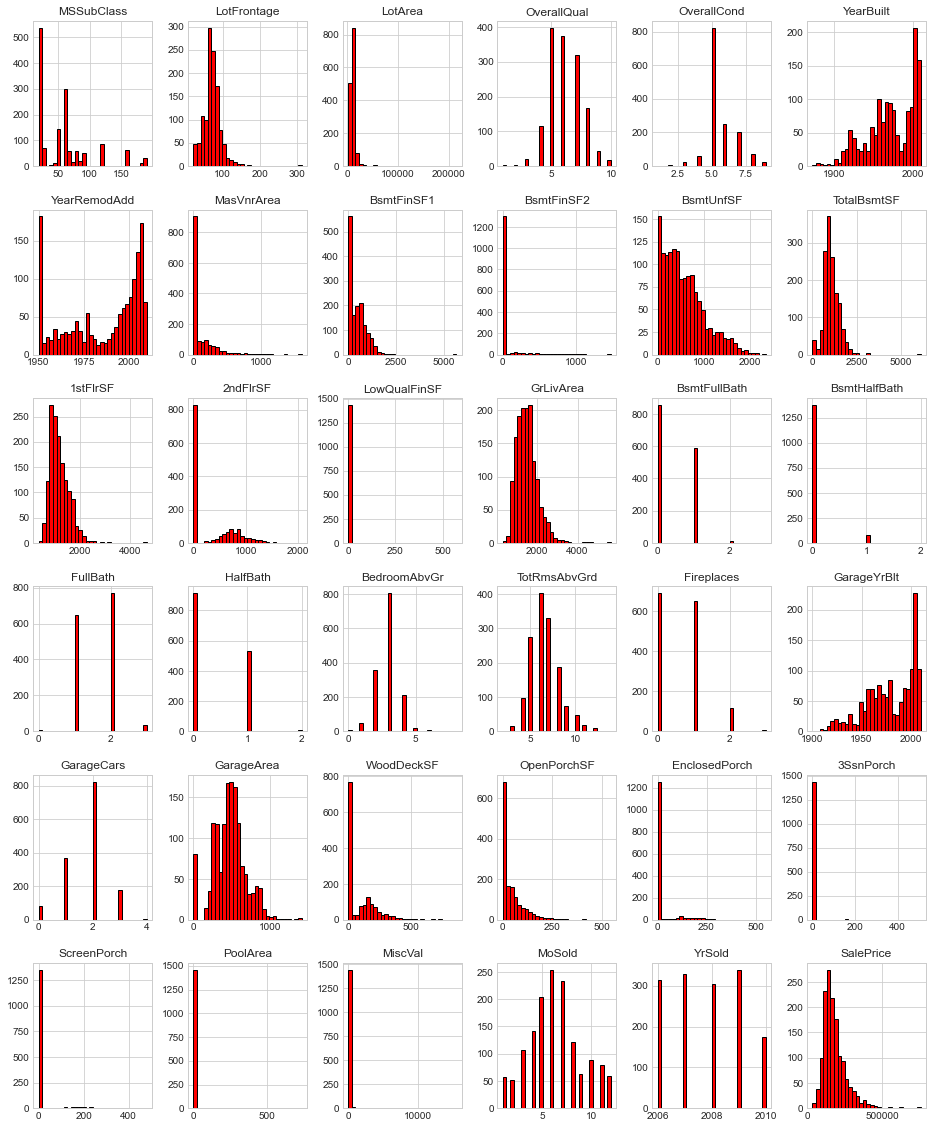

In [411]:
fig_ =df_numer.hist(figsize=(16, 20), bins=30,xlabelsize=10, ylabelsize=10, color="red", edgecolor='black')

correlation

<AxesSubplot:>

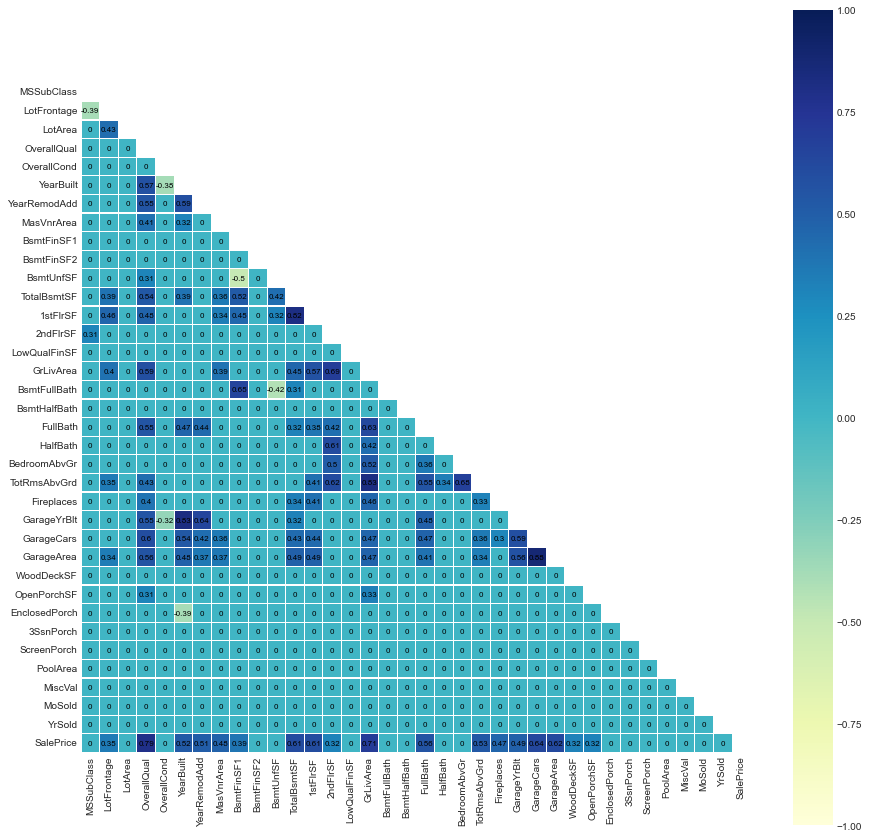

In [412]:
fig, ax = plt.subplots(figsize=(15,15))
corr_matrix = df_numer.corr()
corr_matrix[(corr_matrix < 0.3) & (corr_matrix > -0.3)] = 0
sns.heatmap(corr_matrix, vmax=1.0, vmin=-1.0,mask=np.triu(np.ones_like(corr_matrix, dtype=bool)), linewidths=0.1,cmap="YlGnBu",annot_kws={"size": 8, "color": "black"},ax=ax, square=True, annot=True)

In [413]:
df_corr = df_numer.corr()["SalePrice"][:-1]
highly_corr = df_corr[abs(df_corr) >= 0.5].sort_values(ascending=False)
print(f"strongly correlated values with SalePrice:\n{high_features_list}\n")
slight_corr = df_corr[(abs(df_corr) < 0.5) & (abs(df_corr) >= 0.3)].sort_values(ascending=False)
print(f"slightly correlated values with SalePrice:\n{low_features_list}")

strongly correlated values with SalePrice:
OverallQual    0.79
GrLivArea      0.71
GarageCars     0.64
GarageArea     0.62
TotalBsmtSF    0.61
1stFlrSF       0.61
FullBath       0.56
TotRmsAbvGrd   0.53
YearBuilt      0.52
YearRemodAdd   0.51
Name: SalePrice, dtype: float64

slightly correlated values with SalePrice:
GarageYrBlt   0.49
MasVnrArea    0.48
Fireplaces    0.47
BsmtFinSF1    0.39
LotFrontage   0.35
WoodDeckSF    0.32
2ndFlrSF      0.32
OpenPorchSF   0.32
Name: SalePrice, dtype: float64


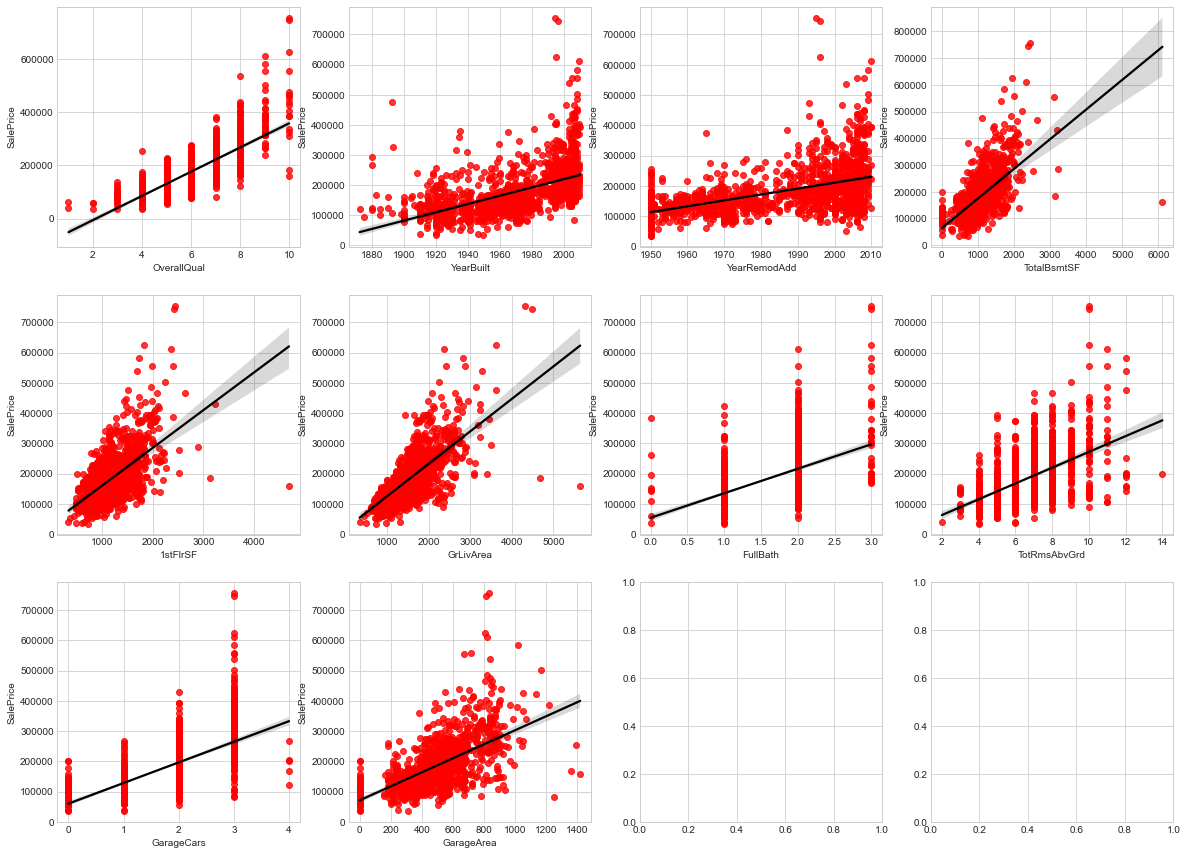

In [414]:
strong_corr_list = df_corr[abs(df_corr) >= 0.5].index.tolist()
strong_corr_list.append("SalePrice")
df_strong = df_numer.loc[:, strong_corr_list]


fig, ax = plt.subplots(round(len(strong_corr_list) / 4), 4,figsize=(20,15))
for i, ax in enumerate(fig.axes):
    if i < len(strong_corr_list)-1:
        sns.regplot(x=strong_corr_list[i], y="SalePrice",ax=ax, data=df_strong, scatter_kws={"color": "red"}, line_kws={"color": "black"})

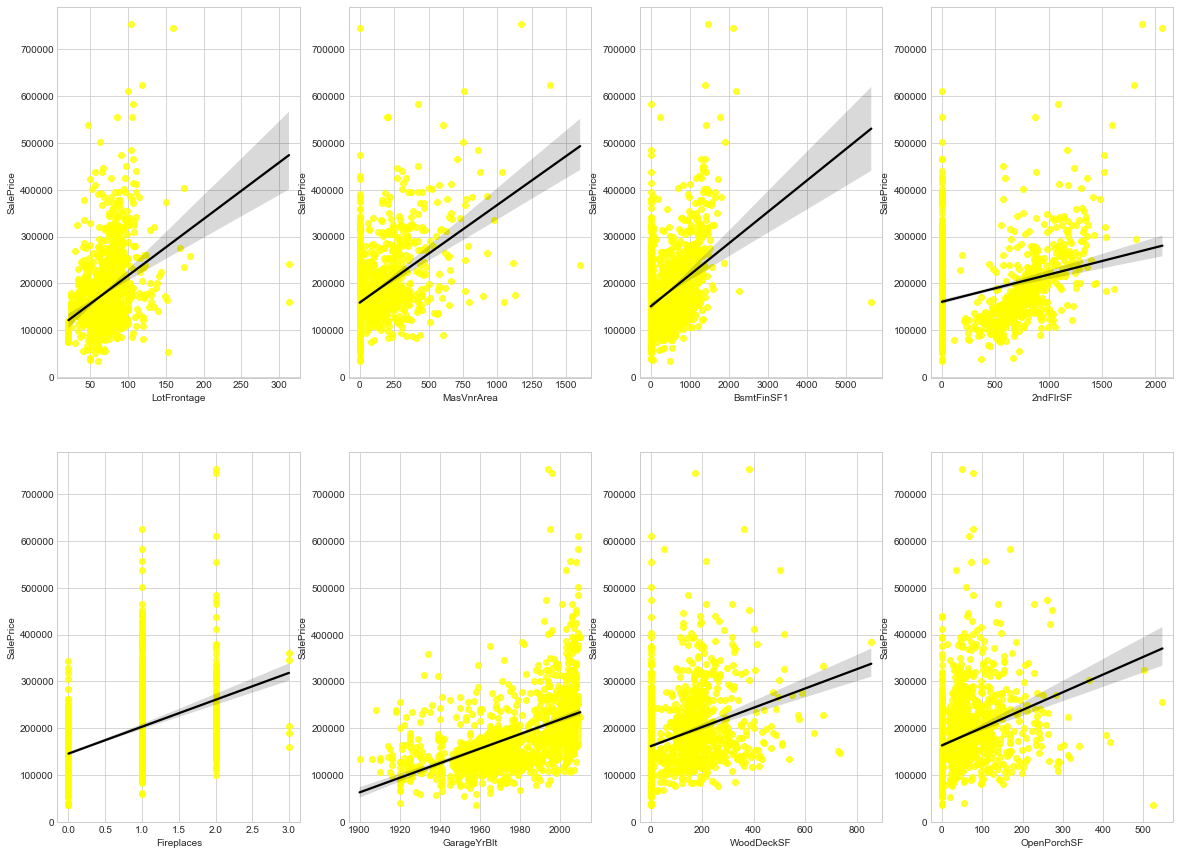

In [415]:
slight_corr_list = df_corr[(abs(df_corr) >= 0.3) & (abs(df_corr) < 0.5)].index.tolist()
slight_corr_list.append("SalePrice")
df_slight = df_numer.loc[:, slight_corr_list]


fig, ax = plt.subplots(round(len(slight_corr_list) / 4), 4,figsize=(20,15))
for i, ax in enumerate(fig.axes):
    if i < len(slight_corr_list)-1:
        sns.regplot(x=slight_corr_list[i], y="SalePrice",ax=ax, data=df_slight, scatter_kws={"color": "yellow"}, line_kws={"color": "black"})

In [416]:
numer_feat_list = strong_corr_list[:-1] + slight_corr_list
numer_feat_list

['OverallQual',
 'YearBuilt',
 'YearRemodAdd',
 'TotalBsmtSF',
 '1stFlrSF',
 'GrLivArea',
 'FullBath',
 'TotRmsAbvGrd',
 'GarageCars',
 'GarageArea',
 'LotFrontage',
 'MasVnrArea',
 'BsmtFinSF1',
 '2ndFlrSF',
 'Fireplaces',
 'GarageYrBlt',
 'WoodDeckSF',
 'OpenPorchSF',
 'SalePrice']

imputation

In [417]:
column_with_nan = df_numer.columns[df_numer.isnull().any()]
column_with_nan

Index(['LotFrontage', 'MasVnrArea', 'GarageYrBlt'], dtype='object')

In [418]:
theimput = SimpleImputer(strategy="median")
df_imputed = pd.DataFrame(theimput.fit_transform(df_numer))
df_imputed.columns = df_numer.columns

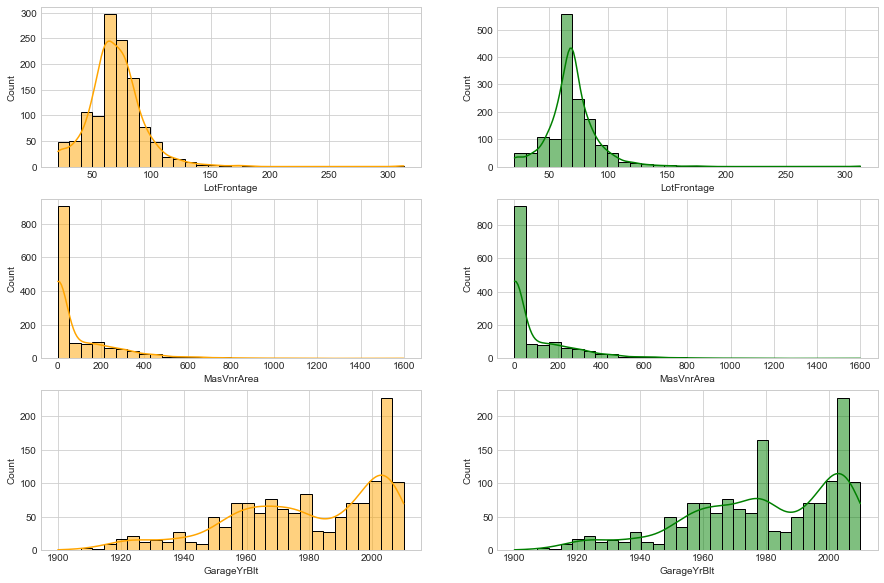

In [419]:
listnan = column_with_nan.tolist()
fig, axes = plt.subplots(len(listnan), 2,figsize=(15,10))
# Plot the results
for feature, fig_pos in zip(listnan,[i for i in range(0, len(listnan))]) :
    # before imputation
    bi = sns.histplot(ax=axes[fig_pos, 0], x=df_numer[feature],kde=True, bins=30, color="orange", edgecolor="black")

    # after imputation
    ai = sns.histplot(ax=axes[fig_pos, 1], x=df_imputed[feature],kde=True, bins=30, color="green", edgecolor="black")

In [420]:
df_imputed.drop(["LotFrontage", "GarageYrBlt"], axis=1, inplace=True)
#we keep only MasVnrArea because it doesn't change when imputed

Categorical features

In [429]:
categorical_features = [i for i in df_train.columns if df_train.dtypes[i] == "object"]
categorical_features.append("SalePrice")

# Train set
df_categ = df_train[categorical_features]

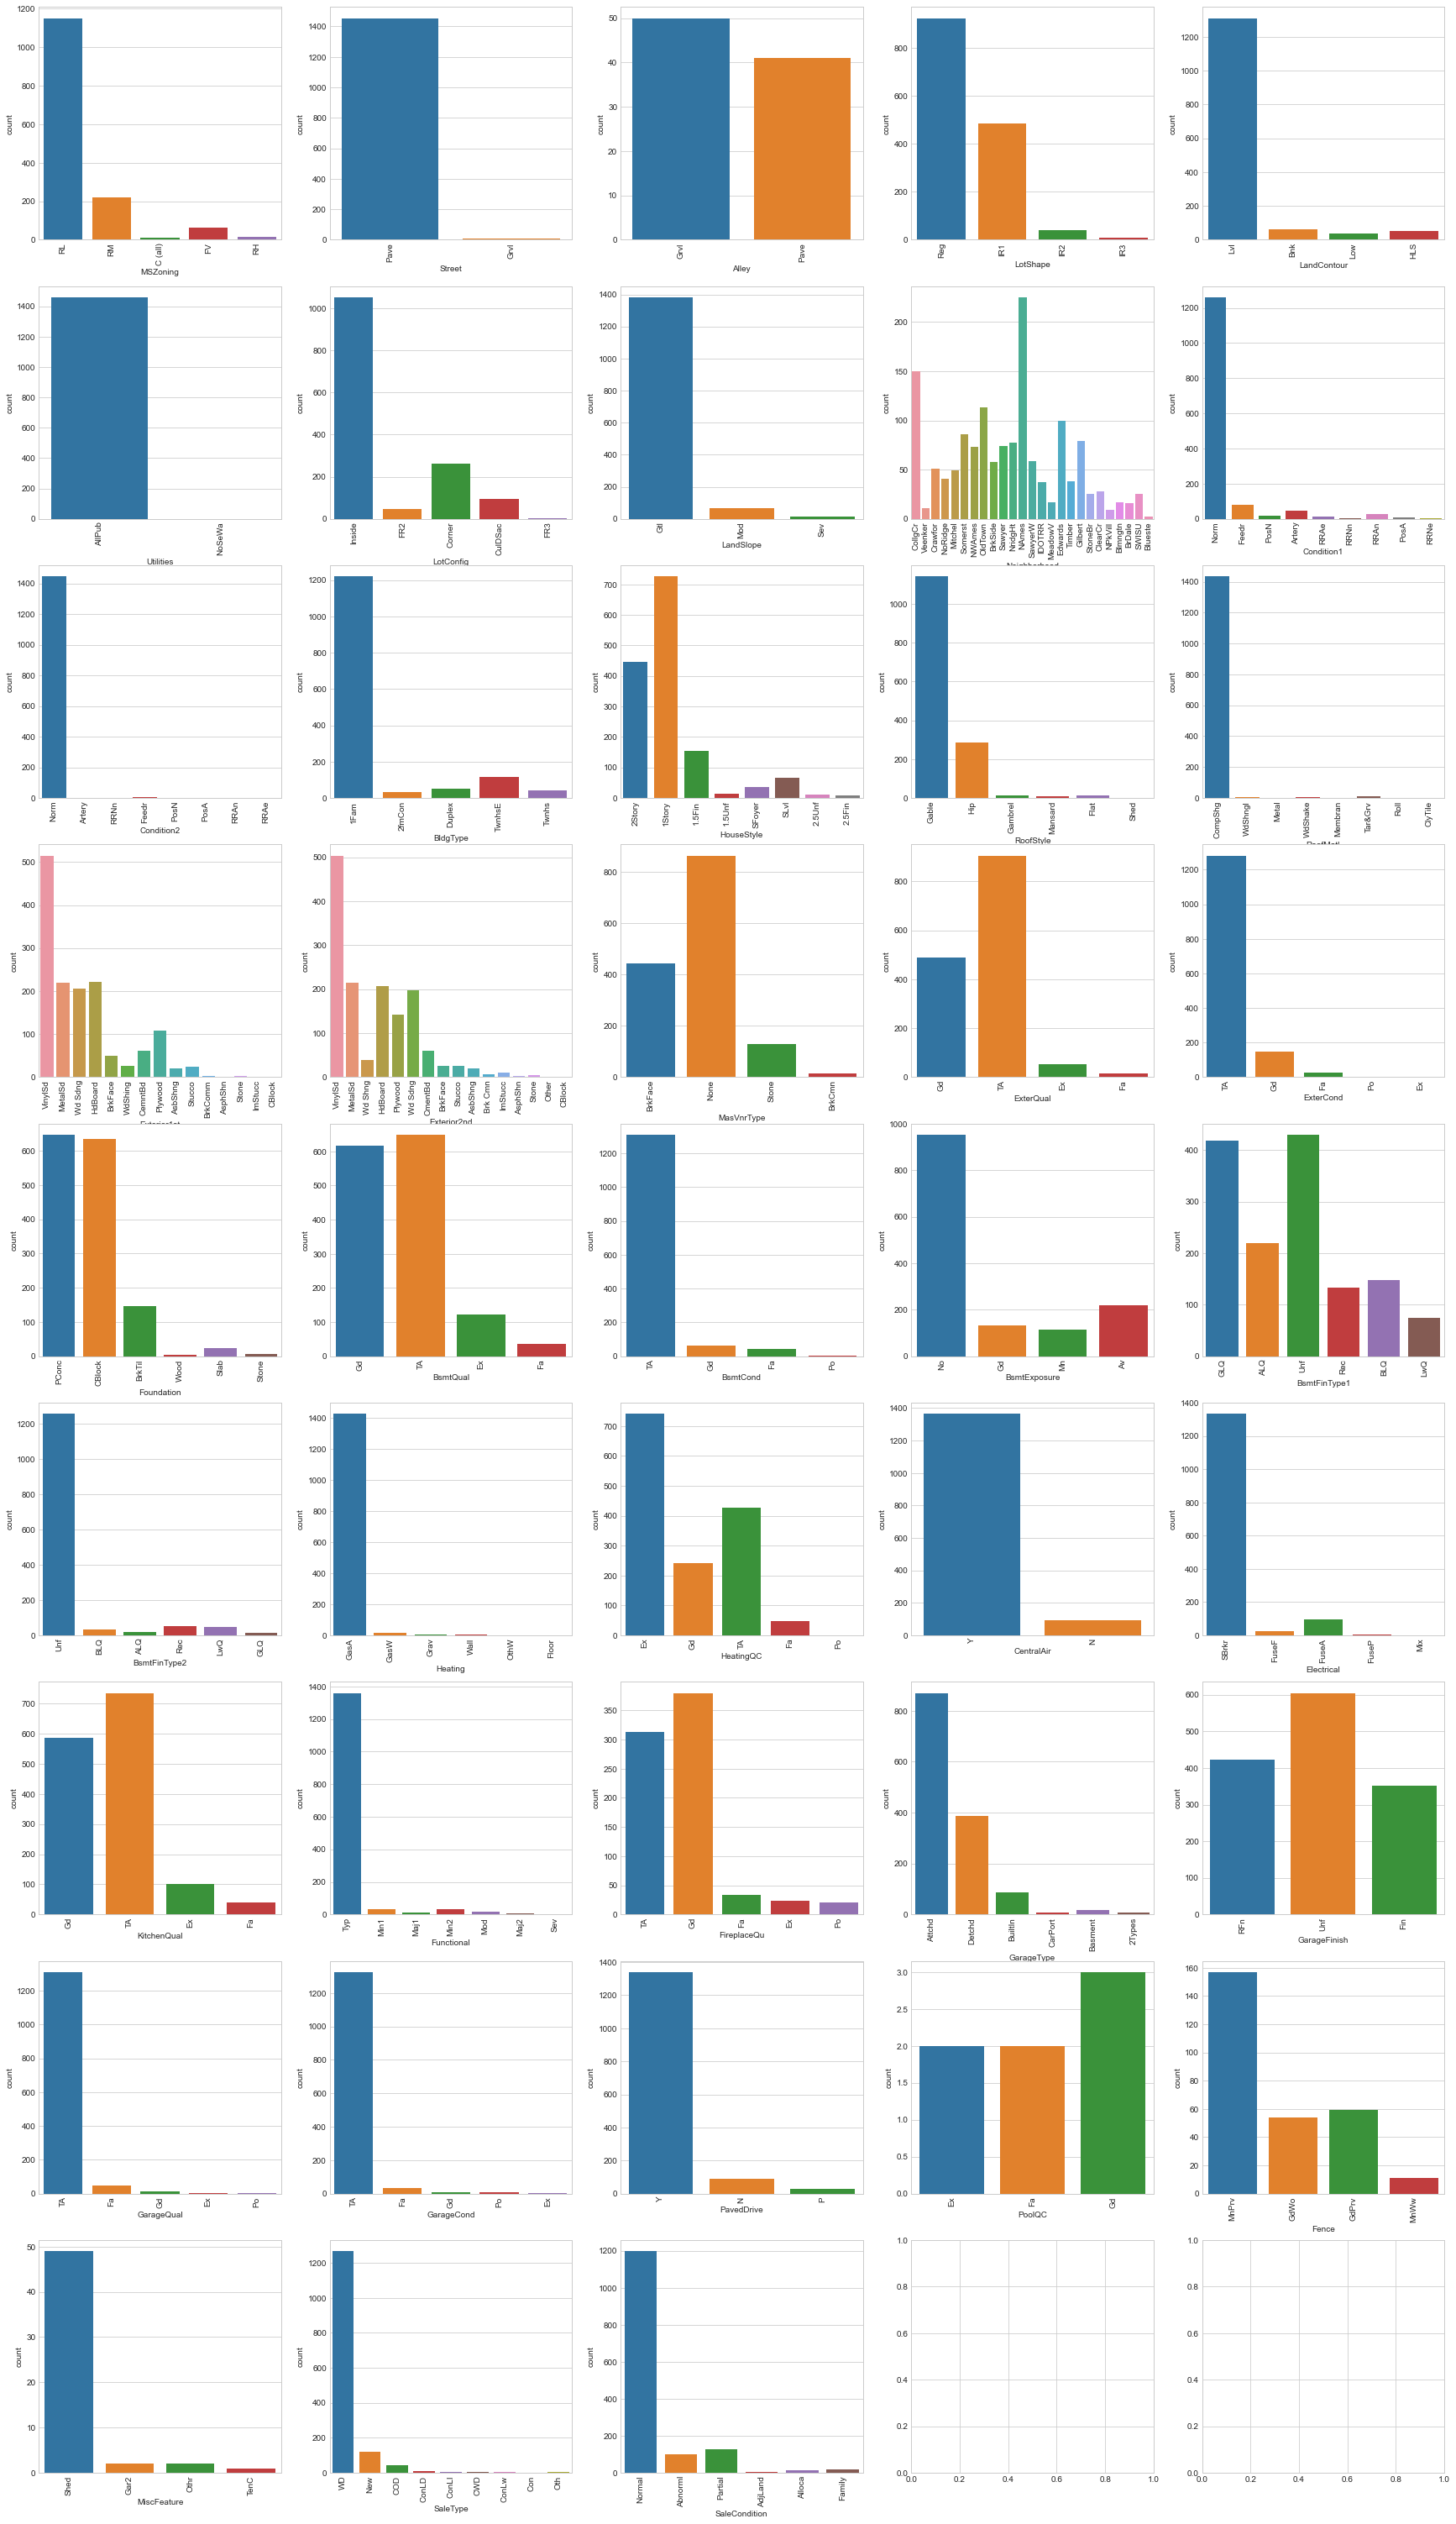

In [430]:
fig, axes = plt.subplots(round(len(df_categ.columns) / 5), 5, figsize=(30, 54))

for i, ax in enumerate(fig.axes):
    # plot barplot of each feature
    if i < len(df_categ.columns) - 1:
        ax.set_xticklabels(ax.xaxis.get_majorticklabels(),rotation=90)
        sns.countplot(x=df_categ.columns[i], data=df_categ, ax=ax)

In [431]:
#Drop non-informative features
df_categ.drop([
    "Street",
    "Alley",
    "LandContour",
    "Utilities",
    "LandSlope",
    "Condition2",
    "RoofMatl",
    "CentralAir",
    "GarageQual",
    "GarageCond",
    "SaleType",
    "PavedDrive",
    "LandContour",
    "ExterCond",
    "GarageCond",
    "Heating",
    "MiscFeature",
    "BsmtFinType2",
    "Functional",
    "GarageQual",
    "GarageCond",
], axis=1, inplace=True)

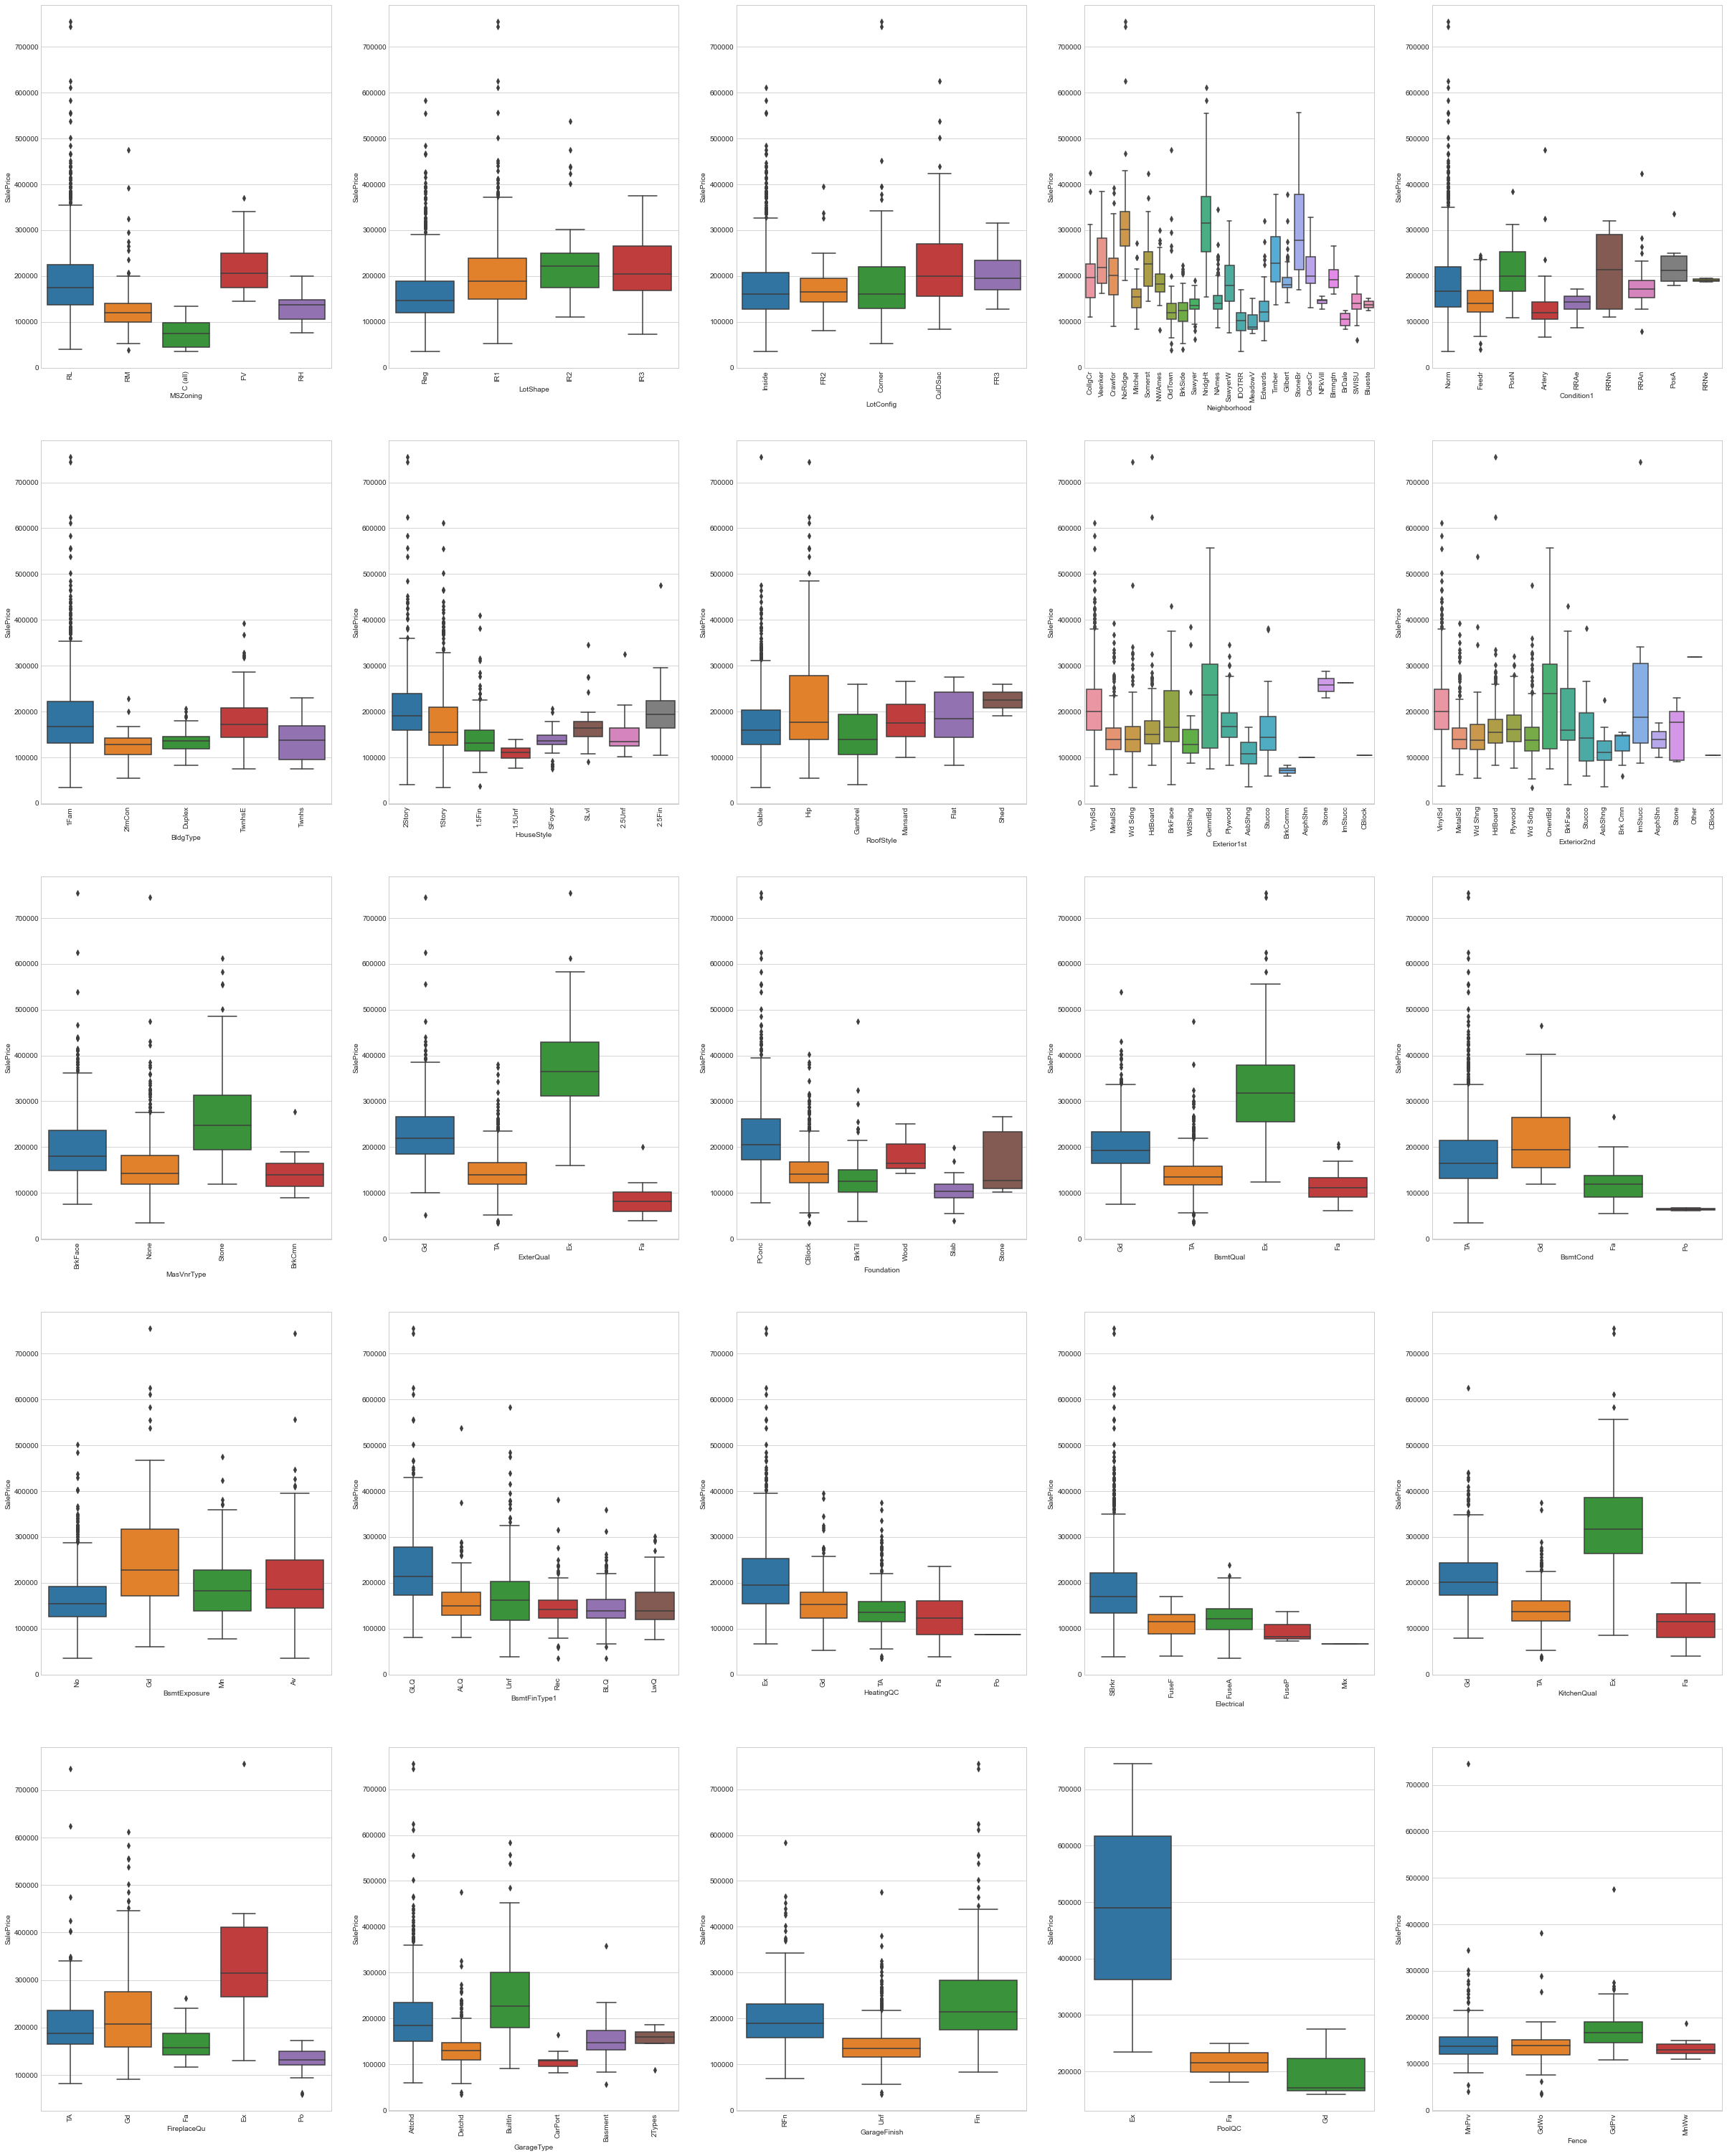

In [432]:
fig, axes = plt.subplots(round(len(df_categ.columns) / 5), 5, figsize=(42, 54))

for i, ax in enumerate(fig.axes):
    # plot the variation of SalePrice in each feature
    if i < len(df_categ.columns) - 1:
        ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=90)
        sns.boxplot(x=df_categ.columns[i], y="SalePrice", data=df_categ, ax=ax)

drop nan from categorical features

In [433]:
column_with_nan = df_categ.columns[df_categ.isnull().any()]
droplist = []
for i in column_with_nan:
    percentnan = round(df_categ[i].isnull().sum() * 100 / len(df_categ), 2)
    if percentnan > 5:
        print(f"Features:{i}")
        print(f"percent of nan:{percentnan}")
        droplist.append(i)
df_categ.drop(droplist, axis=1, inplace=True,)

Features:FireplaceQu
percent of nan:47.26
Features:GarageType
percent of nan:5.55
Features:GarageFinish
percent of nan:5.55
Features:PoolQC
percent of nan:99.52
Features:Fence
percent of nan:80.75


In [434]:
column_with_nan = df_categ.columns[df_categ.isnull().any()]
column_with_nan


Index(['MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'Electrical'],
      dtype='object')

In [435]:
df_categ.drop(["Exterior2nd", "BsmtCond", "BsmtExposure","MasVnrType"], axis=1, inplace=True)
#too much outlier, drop the columns

In [436]:
categ_fill_null = {"BsmtQual": df_categ["BsmtQual"].mode().iloc[0],
                   "BsmtFinType1": df_categ["BsmtFinType1"].mode().iloc[0],
                   "Electrical": df_categ["Electrical"].mode().iloc[0]}
df_categ = df_categ.fillna(value=categ_fill_null)

In [437]:
for i in df_categ.columns.tolist()[:-1]:
    df_dummies = pd.get_dummies(df_categ[i], prefix=i)

    # merge both tables
    df_categ = df_categ.join(df_dummies)

# Select the binary features only
df_binary = df_categ.iloc[:, 18:]
df_binary.head()

,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_Corner,...,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,0,1,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,1,0
1,0,0,0,1,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0
2,0,0,0,1,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
3,0,0,0,1,0,1,0,0,0,1,...,0,0,1,0,1,0,0,0,0,0
4,0,0,0,1,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0


In [438]:
df_train_new = df_imputed.join(df_binary)
print(f"Train set: {df_train_new.shape}")

Train set: (1460, 156)


drop outliers

In [439]:
df_train_new.drop(["WoodDeckSF", "OpenPorchSF","1stFlrSF", "2ndFlrSF","BsmtFinSF1","YearBuilt","YearRemodAdd"], axis=1, inplace=True)
#drop outliers, refers to regplot

In [440]:
outliers1 = df_train_new[(df_train_new["GrLivArea"] > 4000) & (df_train_new["SalePrice"] <= 200000)].index.tolist()

outliers2 = df_train_new[(df_train_new["TotalBsmtSF"] > 3000) & (df_train_new["SalePrice"] <= 400000)].index.tolist()

outliers3 = df_train_new[(df_train_new["GarageArea"] > 1200) & (df_train_new["SalePrice"] <= 300000)].index.tolist()

outliers = outliers1 + outliers2 + outliers3
outliers = list(set(outliers))
print(outliers)
df_train_new = df_train_new.drop(df_train_new.index[outliers])

[1061, 581, 1190, 523, 332, 1298]


log transformation to the target

Text(0, 0.5, 'count')

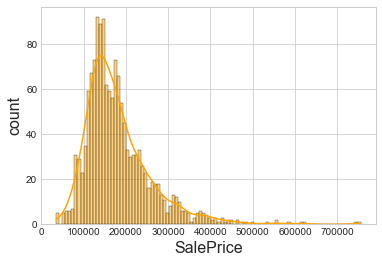

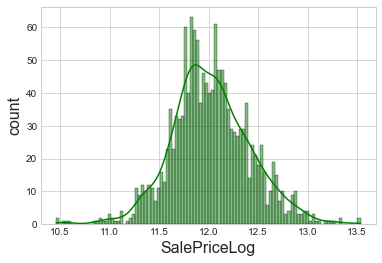

In [441]:
df_train_new["SalePriceLog"] = np.log(df_train_new.SalePrice)
fig, axes = plt.subplots()
# before log transformation
p = sns.histplot(ax=axes, x=df_train_new["SalePrice"], kde=True, bins=100, color="orange")
p.set_xlabel("SalePrice", fontsize=16)
p.set_ylabel("count", fontsize=16)

fig, axes = plt.subplots()
# before log transformation
p = sns.histplot(ax=axes, x=df_train_new["SalePriceLog"], kde=True, bins=100, color="green")
p.set_xlabel("SalePriceLog", fontsize=16)
p.set_ylabel("count", fontsize=16)

In [442]:
df_train_new.drop(["SalePrice"], axis=1, inplace=True)

In [443]:
X = df_train_new.copy()
X.drop(["SalePriceLog"], axis=1, inplace=True)
print(X.shape)
Y = df_train_new.copy().loc[:, "SalePriceLog"]
print(Y.shape)

(1454, 148)
(1454,)


In [444]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, shuffle=True)
print(f"X_train:{X_train.shape}\ny_train:{y_train.shape}")
print(f"\nX_test:{X_test.shape}\ny_test:{y_test.shape}")

X_train:(1163, 148)
y_train:(1163,)

X_test:(291, 148)
y_test:(291,)


In [445]:
std_scale = preprocessing.StandardScaler().fit(X_train)
X_train = pd.DataFrame(std_scale.transform(X_train), columns=X.columns)
X_test = pd.DataFrame(std_scale.transform(X_test), columns=X.columns)

y_train,y_test = pd.DataFrame(y_train),pd.DataFrame(y_test)
y_train,y_test = y_train.reset_index().drop("index", axis=1),y_test.reset_index().drop("index", axis=1)


backward regression to eliminate unnecessary features

In [446]:
Selected_Features = []


def backward_regression(X, y, initial_list=[], threshold_in=0.01, threshold_out=0.05, verbose=True):
    """To select feature with Backward Stepwise Regression 

    Args:
        X -- features values
        y -- target variable
        initial_list -- features header
        threshold_in -- pvalue threshold of features to keep
        threshold_out -- pvalue threshold of features to drop
        verbose -- true to produce lots of logging output

    Returns:
        list of selected features for modeling 
    """
    included = list(X.columns)
    while True:
        changed = False
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max()  # null if pvalues is empty
        if worst_pval > threshold_out:
            changed = True
            worst_feature = pvalues.idxmax()
            included.remove(worst_feature)
            if verbose:
                print(f"worst_feature : {worst_feature}, {worst_pval} ")
        if not changed:
            break
    Selected_Features.append(included)
    print(f"\nSelected Features:\n{Selected_Features[0]}")


# Application of the backward regression function on our training data
backward_regression(X_train, y_train)

worst_feature : MSZoning_RM, 0.9958242290747015 
worst_feature : HouseStyle_2.5Unf, 0.9910045701191053 
worst_feature : HouseStyle_2Story, 0.9936962987310656 
worst_feature : ExterQual_Ex, 0.9831354375994306 
worst_feature : SaleCondition_Normal, 0.963234635724064 
worst_feature : BedroomAbvGr, 0.9503910401415083 
worst_feature : HouseStyle_1.5Fin, 0.9387926172823227 
worst_feature : RoofStyle_Flat, 0.9364310821531007 
worst_feature : RoofStyle_Gambrel, 0.9987095545309671 
worst_feature : RoofStyle_Hip, 0.9949320416270615 
worst_feature : LotShape_Reg, 0.9300753917307101 
worst_feature : Condition1_RRAn, 0.9124722670602613 
worst_feature : Neighborhood_NPkVill, 0.8962542049284129 
worst_feature : ExterQual_Gd, 0.8721031577366081 
worst_feature : Electrical_SBrkr, 0.8572885725014916 
worst_feature : ExterQual_Fa, 0.8477118821221419 
worst_feature : LotConfig_FR3, 0.8408173983439468 
worst_feature : LotConfig_Inside, 0.9242286713408265 
worst_feature : Neighborhood_CollgCr, 0.80965219966

In [447]:
X_train = X_train.loc[:, Selected_Features[0]]
X_test = X_test.loc[:, Selected_Features[0]]

In [448]:
import sklearn
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import linear_model
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

Ordinary Least Squares

In [449]:
reg = linear_model.LinearRegression()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)

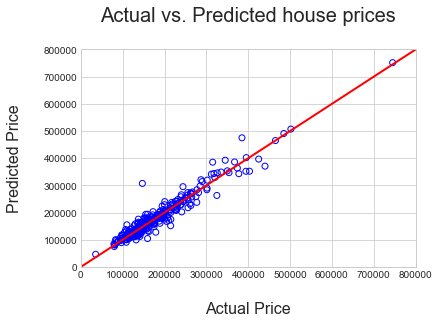

In [450]:
actual_price = np.exp(y_test["SalePriceLog"])
predicted_price = np.exp(y_pred)

plt.figure()
plt.title("Actual vs. Predicted house prices\n", fontsize=20)
plt.scatter(actual_price, predicted_price,
            color="blue", marker="o", facecolors="none")
plt.plot([0, 800000], [0, 800000], "red", lw=2)
plt.xlim(0, 800000)
plt.ylim(0, 800000)
plt.xlabel("\nActual Price", fontsize=16)
plt.ylabel("Predicted Price\n", fontsize=16)
plt.show()

In [451]:
r2_linear = r2_score(y_test, y_pred)
rmse_linear = np.sqrt(mean_squared_error(y_test, y_pred))
print(r2_linear)
print(rmse_linear)

0.9120088867720912
0.11488689809254161


Ridge Regression

In [452]:
reg = linear_model.Ridge(alpha=.5)
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)

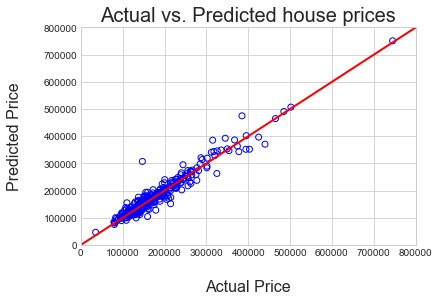

In [453]:
actual_price = np.exp(y_test["SalePriceLog"])
predicted_price = np.exp(y_pred)

plt.figure()
plt.title("Actual vs. Predicted house prices", fontsize=20)
plt.scatter(actual_price, predicted_price,
            color="blue", marker="o", facecolors="none")
plt.plot([0, 800000], [0, 800000], "red", lw=2)
plt.xlim(0, 800000)
plt.ylim(0, 800000)
plt.xlabel("\nActual Price", fontsize=16)
plt.ylabel("Predicted Price\n", fontsize=16)
plt.show()

In [454]:
r2_ridge = r2_score(y_test, y_pred)
rmse_ridge = np.sqrt(mean_squared_error(y_test, y_pred))
print(r2_ridge)
print(rmse_ridge)

0.9120254662000632
0.11487607399500002


Lasso regression

In [455]:
reg = linear_model.Lasso(alpha=0.1)
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)

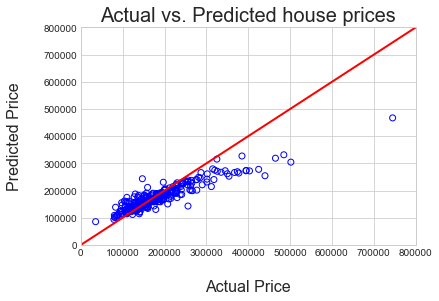

In [456]:
actual_price = np.exp(y_test["SalePriceLog"])
predicted_price = np.exp(y_pred)

plt.figure()
plt.title("Actual vs. Predicted house prices", fontsize=20)
plt.scatter(actual_price, predicted_price,
            color="blue", marker="o", facecolors="none")
plt.plot([0, 800000], [0, 800000], "red", lw=2)
plt.xlim(0, 800000)
plt.ylim(0, 800000)
plt.xlabel("\nActual Price", fontsize=16)
plt.ylabel("Predicted Price\n", fontsize=16)
plt.show()

In [457]:
r2_lasso = r2_score(y_test, y_pred)
rmse_lasso = np.sqrt(mean_squared_error(y_test, y_pred))
print(r2_lasso)
print(rmse_lasso)

0.7654491560549511
0.18757268607523983


Elastic Net regression

In [458]:
reg = ElasticNet(alpha=0.001)
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)

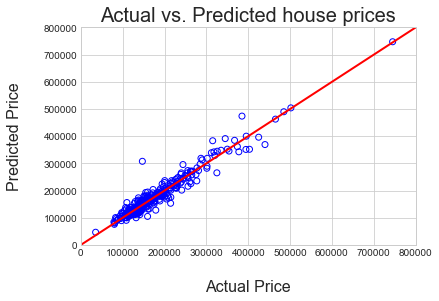

In [459]:
actual_price = np.exp(y_test["SalePriceLog"])
predicted_price = np.exp(y_pred)

plt.figure()
plt.title("Actual vs. Predicted house prices", fontsize=20)
plt.scatter(actual_price, predicted_price,
            color="blue", marker="o", facecolors="none")
plt.plot([0, 800000], [0, 800000], "red", lw=2)
plt.xlim(0, 800000)
plt.ylim(0, 800000)
plt.xlabel("\nActual Price", fontsize=16)
plt.ylabel("Predicted Price\n", fontsize=16)
plt.show()

In [460]:
r2_elas = r2_score(y_test, y_pred)
rmse_elas = np.sqrt(mean_squared_error(y_test, y_pred))
print(r2_elas)
print(rmse_elas)

0.912799843797311
0.11436937007721222


Support Vector Regression

In [461]:
reg = SVR()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)

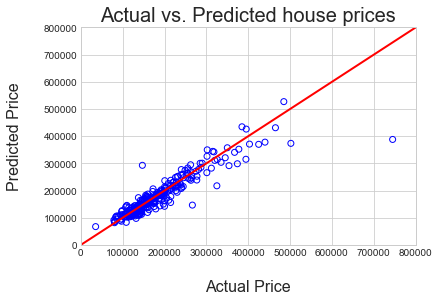

In [462]:
actual_price = np.exp(y_test["SalePriceLog"])
predicted_price = np.exp(y_pred)

plt.figure()
plt.title("Actual vs. Predicted house prices", fontsize=20)
plt.scatter(actual_price, predicted_price,
            color="blue", marker="o", facecolors="none")
plt.plot([0, 800000], [0, 800000], "red", lw=2)
plt.xlim(0, 800000)
plt.ylim(0, 800000)
plt.xlabel("\nActual Price", fontsize=16)
plt.ylabel("Predicted Price\n", fontsize=16)
plt.show()

In [463]:
r2_svr = r2_score(y_test, y_pred)
rmse_svr = np.sqrt(mean_squared_error(y_test, y_pred))
print(r2_svr)
print(rmse_svr)

0.8727556132874477
0.13815621103500847


Random Forest Regressor

In [464]:
reg = RandomForestRegressor()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)

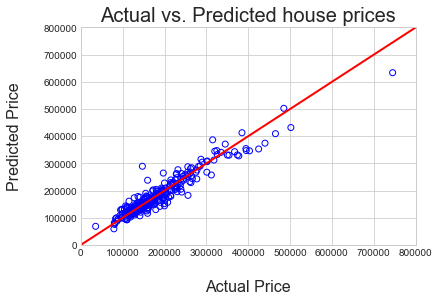

In [465]:
actual_price = np.exp(y_test["SalePriceLog"])
predicted_price = np.exp(y_pred)

plt.figure()
plt.title("Actual vs. Predicted house prices", fontsize=20)
plt.scatter(actual_price, predicted_price,
            color="blue", marker="o", facecolors="none")
plt.plot([0, 800000], [0, 800000], "red", lw=2)
plt.xlim(0, 800000)
plt.ylim(0, 800000)
plt.xlabel("\nActual Price", fontsize=16)
plt.ylabel("Predicted Price\n", fontsize=16)
plt.show()

In [466]:
r2_random = r2_score(y_test, y_pred)
rmse_random = np.sqrt(mean_squared_error(y_test, y_pred))
print(r2_random)
print(rmse_random)

0.8837460114088742
0.13205505448587174


XGBoost

In [467]:
reg = XGBRegressor()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)

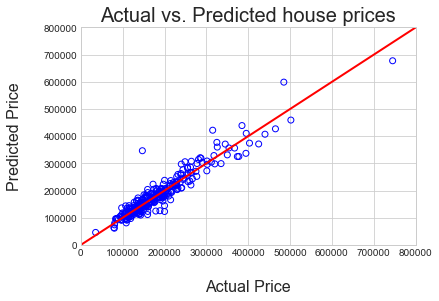

In [468]:
actual_price = np.exp(y_test["SalePriceLog"])
predicted_price = np.exp(y_pred)

plt.figure()
plt.title("Actual vs. Predicted house prices", fontsize=20)
plt.scatter(actual_price, predicted_price,
            color="blue", marker="o", facecolors="none")
plt.plot([0, 800000], [0, 800000], "red", lw=2)
plt.xlim(0, 800000)
plt.ylim(0, 800000)
plt.xlabel("\nActual Price", fontsize=16)
plt.ylabel("Predicted Price\n", fontsize=16)
plt.show()

In [469]:
r2_xgb = r2_score(y_test, y_pred)
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred))
print(r2_xgb)
print(rmse_xgb)

0.8868127544515588
0.1303016284427967


LigthGBM

In [470]:
reg = LGBMRegressor()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)

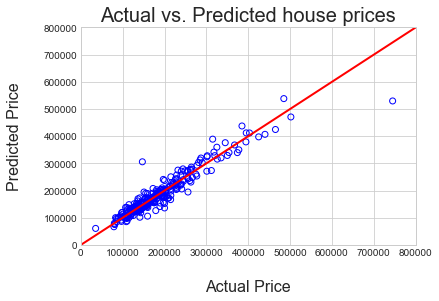

In [471]:
actual_price = np.exp(y_test["SalePriceLog"])
predicted_price = np.exp(y_pred)

plt.figure()
plt.title("Actual vs. Predicted house prices", fontsize=20)
plt.scatter(actual_price, predicted_price,
            color="blue", marker="o", facecolors="none")
plt.plot([0, 800000], [0, 800000], "red", lw=2)
plt.xlim(0, 800000)
plt.ylim(0, 800000)
plt.xlabel("\nActual Price", fontsize=16)
plt.ylabel("Predicted Price\n", fontsize=16)
plt.show()

In [472]:
r2_lgbm = r2_score(y_test, y_pred)
rmse_lgbm = np.sqrt(mean_squared_error(y_test, y_pred))
print(r2_lgbm)
print(rmse_lgbm)

0.9034838611827987
0.12032366929797687


In [473]:
regressor = ['linear','ridge','lasso','elas','svr','random','xgb','lgbm']
print(f"- linear")
print('r2 score:',r2_linear)
print('rmse',rmse_linear,'\n')

print(f"- ridge")
print('r2 score:',r2_ridge)
print('rmse',rmse_ridge,'\n')

print(f"- lasso")
print('r2 score:',r2_lasso)
print('rmse',rmse_lasso,'\n')

print(f"- elas")
print('r2 score:',r2_elas)
print('rmse',rmse_elas,'\n')

print(f"- svr")
print('r2 score:',r2_svr)
print('rmse',rmse_svr,'\n')

print(f"- random")
print('r2 score:',r2_random)
print('rmse',rmse_random,'\n')

print(f"- xgb")
print('r2 score:',r2_xgb)
print('rmse',rmse_xgb,'\n')

print(f"- lgbm")
print('r2 score:',r2_lgbm)
print('rmse',rmse_lgbm,'\n')

- linear
r2 score: 0.9120088867720912
rmse 0.11488689809254161 

- ridge
r2 score: 0.9120254662000632
rmse 0.11487607399500002 

- lasso
r2 score: 0.7654491560549511
rmse 0.18757268607523983 

- elas
r2 score: 0.912799843797311
rmse 0.11436937007721222 

- svr
r2 score: 0.8727556132874477
rmse 0.13815621103500847 

- random
r2 score: 0.8837460114088742
rmse 0.13205505448587174 

- xgb
r2 score: 0.8868127544515588
rmse 0.1303016284427967 

- lgbm
r2 score: 0.9034838611827987
rmse 0.12032366929797687 



The end